In [52]:
! pip install tensorflow opencv-python matplotlib numpy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [53]:
import tensorflow as tf
import imghdr
import os

In [54]:
import cv2
from matplotlib import pyplot as plt

In [55]:
data_dir1='./3/man_mask/'
data_dir2='./3/woman_mask/'

In [56]:
os.listdir(data_dir1)

['200417-think-coronavirus-vs-protest-masks-main-se-1103p.jpg',
 'uvmhn-staying-healthy-coronavirus-man-wearing-mask.jpg',
 'Francis-Collins-Mask.jpg',
 'handsome-young-man-wearing-protective-face-mask-against-wall-during-covid-19-GGGF00569.jpg',
 'shutterstock_1742084420.jpg',
 '1657735528-9537.jpg',
 'man-wearing-double-masks-1.jpg',
 'visual_v1.png',
 'closeup-man-disposable-medical-mask-260nw-1708100638.jpg',
 'black-man-holding-up-mask.jpg',
 '107001909-1642208028935-gettyimages-1236298614-UK_COP26.jpeg',
 '104441.jpg',
 'b448b5c30cfb31a1774ab22a5195566b.jpg',
 '-wearing-the-face-mask-to-avoid-virus-infection-photocase-stock-photo-large.jpeg',
 'masked20man20in20car20GettyImages-121300035020MEDIUM.jpg',
 '236944-man-55905321920.jpg',
 'image28.jpeg',
 'HONABxupermask.will.i.am.jpg',
 'AdobeStock_345360112.jpeg',
 'cept-south-asian-indian-man-wearing-mask-for-protect-from-corona-virus-photo.jpg',
 '40561087cb6f1455b025050644477f55.jpg',
 '00hospitals-01-kltg-articleLarge.jpg',
 '10

In [57]:
image_exts=['jpeg','jpg','bmp','png']

In [58]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [59]:
for file in os.listdir(data_dir1):
  letters=file[-4:]
  if letters not in ['jpeg', '.jpg', '.png', '.bmp']: print(file)

In [60]:
for file in os.listdir(data_dir2):
  letters=file[-4:]
  if letters not in ['jpeg', '.jpg', '.png', '.bmp']: print(file)

In [61]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [63]:
data=tf.keras.utils.image_dataset_from_directory('3')

Found 187 files belonging to 2 classes.


In [64]:
data_iterator=data.as_numpy_iterator()

In [65]:
batch=data_iterator.next()

In [66]:
batch[0].shape

(32, 256, 256, 3)

In [67]:
batch[1]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

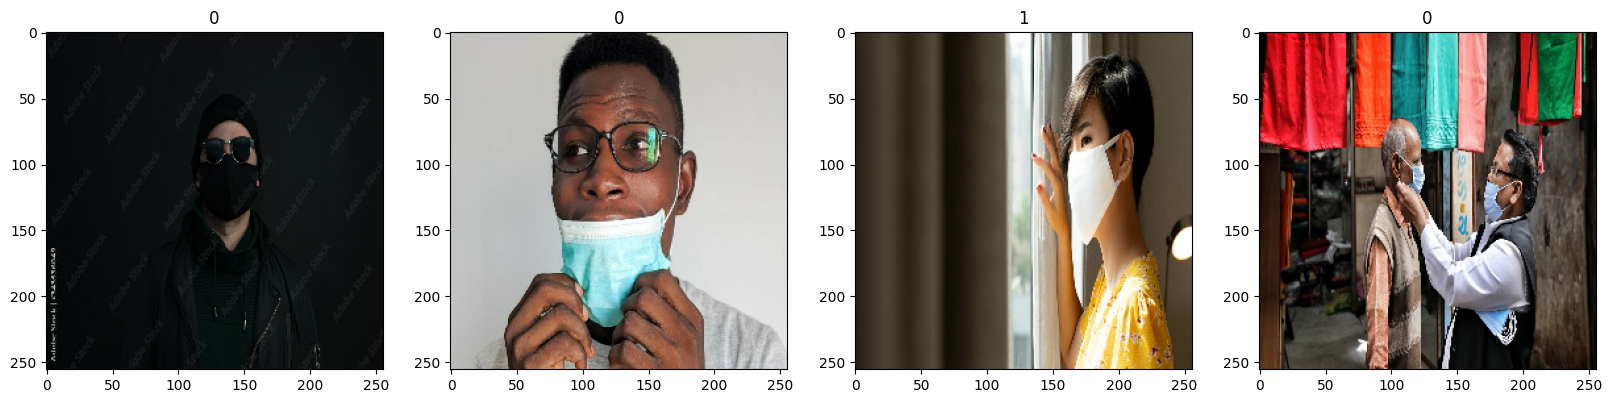

In [68]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
 ax[idx].imshow(img.astype(int))
 ax[idx].title.set_text(batch[1][idx])


In [69]:
data=data.map(lambda x,y:(x/255,y))

In [70]:
data.as_numpy_iterator().next()[0].max()

1.0

In [71]:
len(data)

6

In [72]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [73]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [74]:
from keras.models import Sequential


In [75]:
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten

In [76]:
model=Sequential()

In [77]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
logdir='logs'

In [81]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 746ms/step - accuracy: 0.5885 - loss: 1.5064 - val_accuracy: 0.2812 - val_loss: 0.8584
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.4250 - loss: 0.7636 - val_accuracy: 0.6875 - val_loss: 0.6913
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.5927 - loss: 0.6888 - val_accuracy: 0.6250 - val_loss: 0.6711
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 590ms/step - accuracy: 0.5740 - loss: 0.6795 - val_accuracy: 0.5312 - val_loss: 0.6769
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - accuracy: 0.5490 - loss: 0.6732 - val_accuracy: 0.6562 - val_loss: 0.6374
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 596ms/step - accuracy: 0.5260 - loss: 0.6705 - val_accuracy: 0.8125 - val_loss: 0.6499
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.6844 - loss: 0.6382 - val_accuracy: 0.8438 - val_loss: 0.6077
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 625ms/step - accuracy: 0.7396 - loss: 0.6160 - val_accuracy: 0.6875 - val_loss:

In [83]:
hist

In [84]:
hist.history

{'accuracy': [0.5390625,
  0.4609375,
  0.5703125,
  0.5390625,
  0.546875,
  0.6328125,
  0.625,
  0.71875,
  0.796875,
  0.828125,
  0.765625,
  0.8515625,
  0.90625,
  0.8984375,
  0.9296875,
  0.984375,
  0.96875,
  0.9453125,
  0.9609375,
  0.9765625],
 'loss': [1.5104035139083862,
  0.7376840710639954,
  0.6879083514213562,
  0.6825800538063049,
  0.6697930693626404,
  0.6629140377044678,
  0.64194655418396,
  0.6193560361862183,
  0.5759758353233337,
  0.49973446130752563,
  0.4645118713378906,
  0.3938642740249634,
  0.2954365313053131,
  0.2776907980442047,
  0.20851102471351624,
  0.13206955790519714,
  0.1336742788553238,
  0.11855410039424896,
  0.09918054938316345,
  0.08603684604167938],
 'val_accuracy': [0.28125,
  0.6875,
  0.625,
  0.53125,
  0.65625,
  0.8125,
  0.84375,
  0.6875,
  0.84375,
  0.875,
  0.875,
  0.875,
  0.96875,
  0.9375,
  1.0,
  0.9375,
  1.0,
  1.0,
  0.96875,
  1.0],
 'val_loss': [0.8583951592445374,
  0.6913421750068665,
  0.6711092591285706,
  0

In [85]:
from keras.metrics import Precision ,Recall, BinaryAccuracy

In [86]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [87]:
len(test)

1

In [88]:
for batch in test.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


2024-05-23 19:20:06.736526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [89]:
print(f'Precission:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precission:1.0,Recall:0.8999999761581421,Accuracy:0.9629629850387573


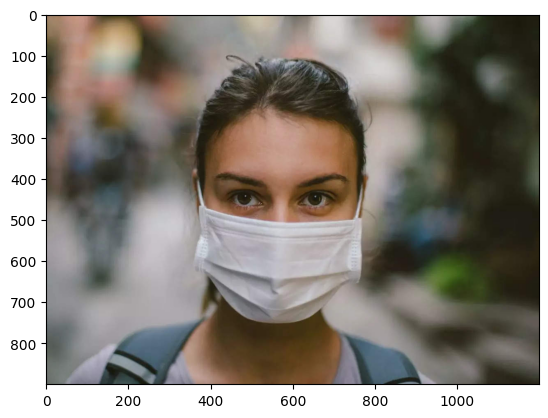

In [90]:
img=cv2.imread('./woman1.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

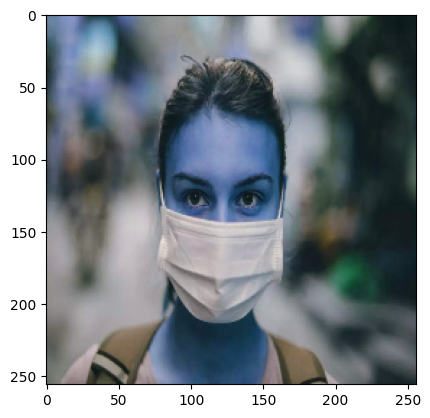

In [91]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [93]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [94]:
yhat

array([[0.87730265]], dtype=float32)

In [95]:
if yhat>0.5:
  print(f'Image is of a female')
else:
  print(f'Image is of a male')

Image is of a female


In [96]:
from keras.models import load_model

In [97]:
model.save(os.path.join('model','gender_classification.h5'))

In [98]:
new_model=load_model(os.path.join('model','gender_classification.h5'))

In [99]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [100]:
if yhat>0.5:
  print(f'Image is of a female')
else:
  print(f'Image is of a male')

Image is of a female
